## number index and area fraction - example

number index and area fraction -  Number of contiguous convective regions (objects) in a scene, given that the total area is roughly fixed
<br>

In [11]:
import xarray as xr
import numpy as np
import skimage.measure as skm
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

from os.path import expanduser
home = expanduser("~")

from cmip5_metrics.funcs.vars.myFuncs import *
from cmip5_metrics.funcs.vars.myPlots import *
from cmip5_metrics.funcs.prFuncs import *
from cmip5_metrics.funcs.aggFuncs import *
#import constructed_fields

import timeit

switch = {
    'local_files': True, 
    'nci_files': False, 
    'constructed_fields': False
}

### precipitation

In [2]:
models = [
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 # cannot concatanate files for rcp85 run
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]
model = models[0]


experiments = [
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]                


if switch['local_files']:
    folder = home + '/Documents/data/cmip5/' + model
    fileName = model + '_precip_' + experiment + '.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    precip = ds.precip*60*60*24
    precip.attrs['units']= 'mm/day'

if switch['nci_files']:
    precip = get_pr(model, experiment).precip # from prVars

# if switch['constructed_fields']:
#     precip = constructed_fields.precip_fields

In [3]:
precip

<xarray.DataArray 'precip' (time: 10950, lat: 22, lon: 128)>
array([[[4.08858657e-01, 3.12826395e-01, 2.66478002e-01, ...,
         7.82788754e-01, 5.55889487e-01, 4.91493523e-01],
        [4.22117233e-01, 2.40650624e-01, 1.58740297e-01, ...,
         8.07168961e-01, 5.85888326e-01, 5.24520874e-01],
        [2.71370828e-01, 1.18661821e-01, 6.75984770e-02, ...,
         4.74144459e-01, 4.24919963e-01, 4.05480087e-01],
        ...,
        [1.90939274e-04, 2.30353166e-04, 4.63937467e-05, ...,
         0.00000000e+00, 2.78055512e-09, 2.02344672e-05],
        [1.62480981e-04, 5.49919961e-04, 2.26543372e-04, ...,
         4.59178806e-11, 3.44704154e-10, 2.20209113e-05],
        [1.87449245e-04, 8.20199493e-05, 4.61850832e-05, ...,
         4.66769282e-03, 5.29152434e-03, 3.79748479e-03]],

       [[5.20864546e-01, 5.28695166e-01, 4.83805656e-01, ...,
         5.20202994e-01, 4.44190621e-01, 4.29574966e-01],
        [4.38689321e-01, 4.05646205e-01, 2.81971216e-01, ...,
         4.92263496e-01, 3.51503998e-01, 3.77124488e-01],
        [5.00151277e-01, 4.25230354e-01, 1.98965132e-01, ...,
         4.04337049e-01, 3.45240235e-01, 4.43055809e-01],
...
        [5.59766899e-09, 2.99688229e-32, 0.00000000e+00, ...,
         2.86355467e-10, 7.04136927e-09, 1.71255028e-08],
        [4.88535523e-09, 1.17072363e-09, 8.21280643e-09, ...,
         5.12836152e-07, 5.82156972e-08, 3.00863725e-08],
        [1.89105576e-05, 2.66464149e-08, 4.29197513e-08, ...,
         2.21278742e-02, 2.44675390e-02, 2.96266121e-03]],

       [[2.66608298e-01, 2.07568243e-01, 2.14525402e-01, ...,
         1.79786175e-01, 2.77063102e-01, 3.14550877e-01],
        [3.14109057e-01, 3.18816870e-01, 2.46779546e-01, ...,
         3.24843109e-01, 3.32155108e-01, 2.67388195e-01],
        [4.73636806e-01, 4.05086994e-01, 3.10137302e-01, ...,
         2.16585651e-01, 3.06336045e-01, 4.47086453e-01],
        ...,
        [1.05024958e-02, 5.50237438e-03, 3.46267416e-06, ...,
         1.23978796e-04, 9.12268995e-04, 3.50002619e-03],
        [8.40858263e-07, 4.97356996e-06, 1.98428370e-06, ...,
         3.36105913e-05, 9.05447791e-07, 2.45206934e-07],
        [6.08904869e-04, 9.31636605e-05, 4.13278076e-06, ...,
         7.81251043e-02, 1.14151299e-01, 3.18472683e-02]]], dtype=float32)
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    units:    mm/day

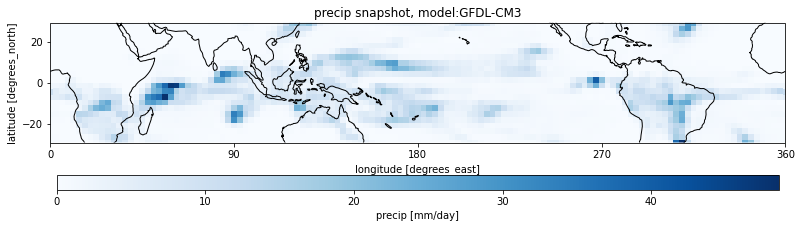

In [4]:
plot_snapshot(precip.isel(time=0), 'Blues', 'precip', model) # from vars.myPlots

### convective threshold and area fraction

In [5]:
pr_percentiles = calc_pr_percentiles(precip) # from prFuncs
pr_percentiles

<xarray.Dataset>
Dimensions:  (time: 10950)
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
Data variables:
    pr95     (time) float64 14.08 13.81 14.17 14.02 ... 16.82 16.76 16.91 15.32
    pr97     (time) float64 17.44 17.1 17.44 17.31 ... 20.42 21.26 21.76 19.81
    pr99     (time) float64 25.16 28.12 26.33 25.34 ... 25.66 29.67 33.37 31.73
    pr999    (time) float64 46.43 56.0 75.17 68.38 ... 41.02 47.47 67.33 72.96

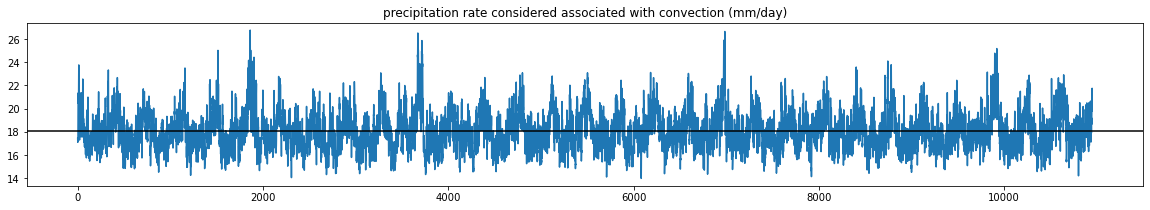

In [9]:
percentile = 'pr97'
conv_threshold = pr_percentiles[percentile].mean(dim=('time'))
plt.figure(figsize= (20,3))
plt.plot(pr_percentiles[percentile])
plt.title('precipitation rate considered associated with convection (mm/day)')
plt.axhline(y=conv_threshold, color='k')

In [27]:
start = timeit.default_timer()
numberIndex = calc_numberIndex(precip, conv_threshold) # from aggFuncs
stop = timeit.default_timer()
print('it takes {} seconds to calculate the number index for model: {}'.format((stop-start), model))

it takes 25.249444250000124 seconds to calculate the number index for model: GFDL-CM3


In [21]:
numberIndex

<xarray.Dataset>
Dimensions:   (time: 10950)
Coordinates:
  * time      (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
Data variables:
    o_number  (time) float64 16.0 13.0 14.0 12.0 14.0 ... 17.0 16.0 21.0 16.0
    areaf     (time) float64 0.0282 0.02754 0.02669 ... 0.04735 0.04395 0.03731

Text(0.5, 1.0, 'areafraction covered by convection, defined from average percentile precipiitaiton rate (fixed precipitation rate)')

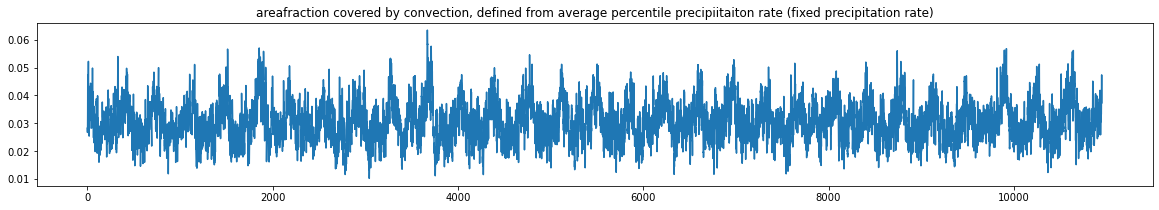

In [15]:
plt.figure(figsize= (20,3))
plt.plot(numberIndex.areaf)
plt.title('areafraction covered by convection, defined from average percentile precipiitaiton rate (fixed precipitation rate)')

### number index

In [17]:
# label 8-connected (2-connectivity) objects
L = skm.label(precip.isel(time=0).where(precip.isel(time=0)>=conv_threshold,0)>0, background=0,connectivity=2)
connect_boundary(L) # from aggFuncs
L_xr = xr.DataArray(
    data=L,
    dims=['lat', 'lon'],
    coords={'lat': precip.lat.data, 'lon': precip.lon.data}
    )

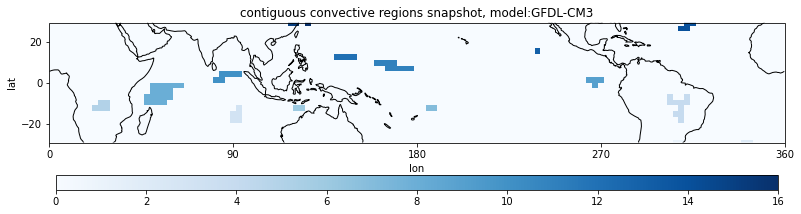

In [18]:
plot_snapshot(L_xr, 'Blues', 'contiguous convective regions', model)

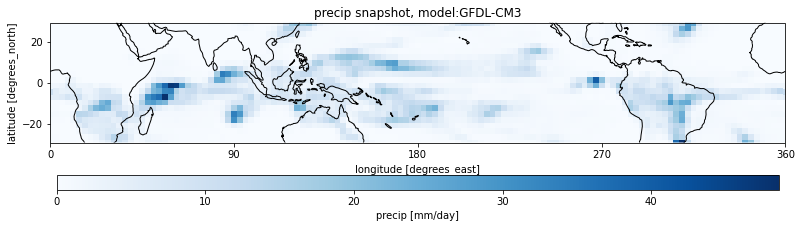

In [19]:
plot_snapshot(precip.isel(time=0), 'Blues', 'precip', model)

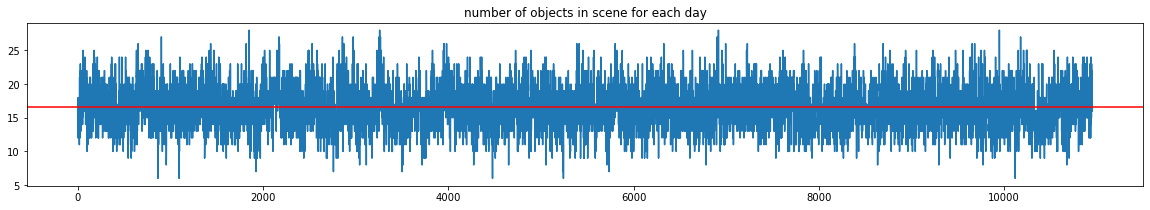

In [26]:
plt.figure(figsize= (20,3))
plt.plot(numberIndex.o_number)
plt.title('number of objects in scene for each day')
plt.axhline(y=np.mean(numberIndex.o_number), color='r')

In [ ]:
saveit = False
if saveit:
    fileName = model + '_numberIndex_' + experiment + '.nc'

    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model
        
    if switch['constructed_fields']:
        fileName = 'constructedFields' + '_numberIndex_' + experiment + '.nc'
        folder = home + '/Documents/data/cmip5/' + model

    save_file(numberIndex, folder, fileName) # from vars.myFuncs